# Práctica de SVM: Clasificación de las flores de Iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
Y = iris.target

In [4]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [5]:
X_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [6]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para la flores de iris, con kernel=lineal')

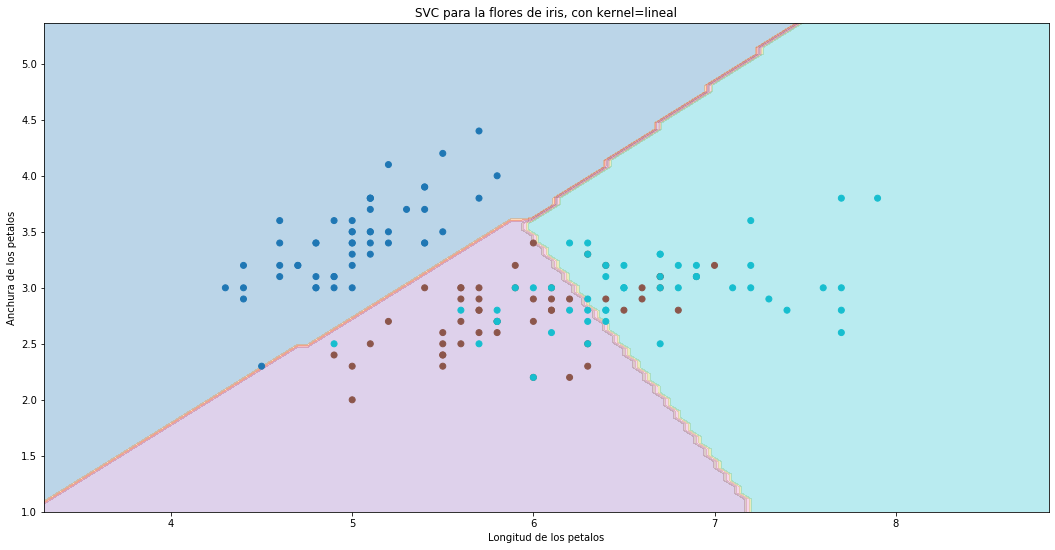

In [7]:
plt.figure(figsize=(18,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para la flores de iris, con kernel=lineal")

In [8]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr", gamma="auto").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para la flores de iris, con kernel=radial')

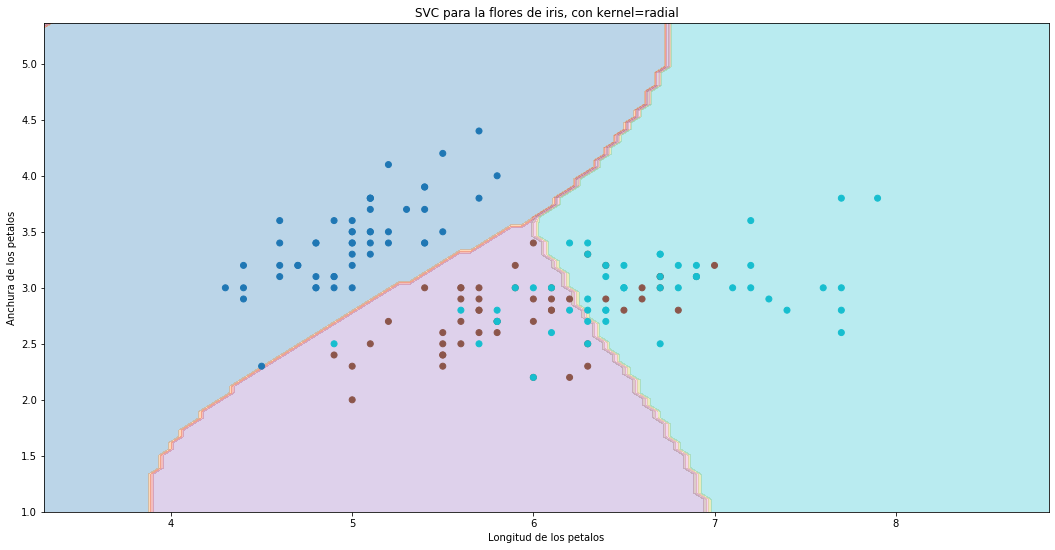

In [9]:
plt.figure(figsize=(18,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para la flores de iris, con kernel=radial")

Text(0.5, 1.0, 'SVC para la flores de iris, con kernel=poli')

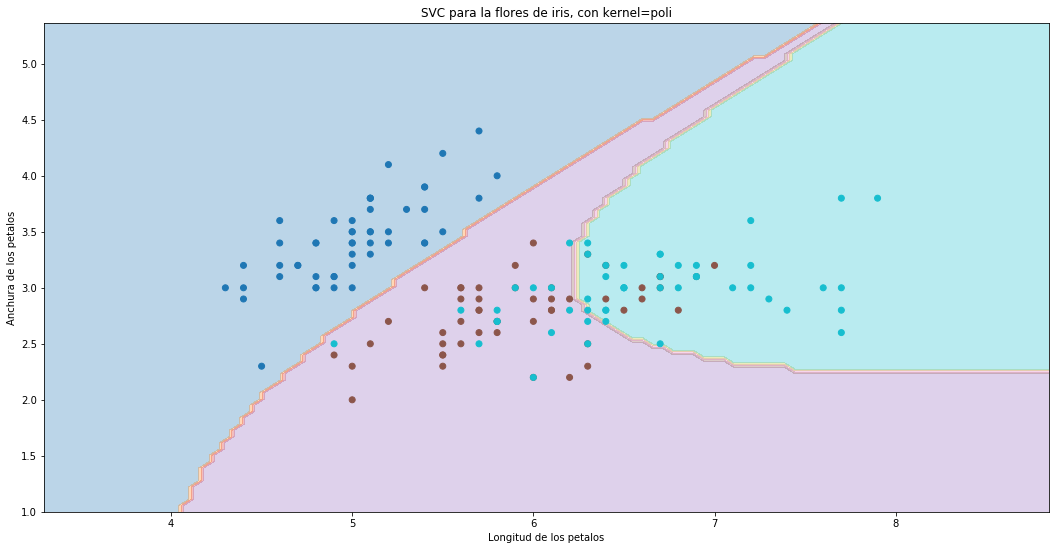

In [10]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr", gamma="auto").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(18,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para la flores de iris, con kernel=poli")

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [12]:
X, Y = shuffle(X,Y, random_state=0)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [14]:
parameters = [
    {
        'kernel' : ["rbf"],
        'gamma' : [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5],
        'C' : [1, 10, 100, 1000]
    },
    {
        'kernel' : ["linear"],
        'C' : [1, 10, 100, 1000]
    }
]

In [15]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.0010004 , 0.00100064, 0.00080061, 0.00100069, 0.00060043,
        0.00020018, 0.00080547, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00312548, 0.00312495, 0.        ,
        0.        , 0.00312819, 0.0031251 ]),
 'std_fit_time': array([5.84003864e-07, 3.37174788e-07, 4.00304865e-04, 9.53674316e-08,
        4.90251808e-04, 4.00352478e-04, 4.02845414e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.25095367e-03, 6.24990463e-03,
        0.00000000e+00, 0.00000000e+00, 6.25638962e-03, 6.25019073e-03]),
 'mean_score_time': array([0.00060072, 0.00020008, 0.00020018, 0.        , 

In [18]:
mean = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for m, s, p in zip(mean,stds,params):
    print("%0.3f (+/-%0.3f) para %r"%(m, s, p))

0.747 (+/-0.062) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.065) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.062) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.049) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.058) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.063) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.062) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.062) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.053) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.040) para {'C': 100, 'gamma'

In [19]:
Ypred = clf.predict(X_test)

In [20]:
print(classification_report(Y_test,Ypred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



# Truco qué hacer cuando me toca hacer una análisis de datos

In [21]:
def svm_iris(C = 1.0, gamma=0.01, kernel="rbf"):
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn import svm, datasets
    
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    Y = iris.target
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_plot = np.c_[xx.ravel(), yy.ravel()]

    #C = 1.0
    svc = svm.SVC(kernel=kernel, C=C, decision_function_shape="ovr",gamma=gamma).fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(18,9))
    plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los petalos")
    plt.ylabel("Anchura de los petalos")
    plt.xlim(xx.min(),xx.max())
    plt.title("SVC para la flores de iris, con kernel="+kernel)

In [22]:
from ipywidgets import interact, fixed

In [23]:
interact(svm_iris,
         C=[0.01, 0.1, 1, 10, 100, 1000, 1e10],
        gamma=[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.5, 0.9],
        kernel=["rbf","linear", "sigmoid", "poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 10000000000.0),…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>